# 02ProvinceCOVID19

# Libraries

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from IPython.display import display

sns.set_palette("pastel")

# Load Data

In [2]:
province = pd.read_csv(
    "C:\py\Projects\TuringCollege\COVID19\DataSets\province.csv",
    index_col=False,
    skipinitialspace=True,
)

# Size

In [3]:
province.shape

(2771, 6)

# Data Types

In [4]:
province.dtypes

date         object
time          int64
province     object
confirmed     int64
released      int64
deceased      int64
dtype: object

# Modify the Date Column

In [5]:
province["date"] = province["date"].astype("datetime64[ns]")

# Missing Data

In [6]:
province.isna().sum()

date         0
time         0
province     0
confirmed    0
released     0
deceased     0
dtype: int64

# Delete Unneeded Columns

In [7]:
province = province.drop(["time", "released"], axis=1)

# Rename Columns

In [8]:
province.rename(
    columns={
       "date": "Date",
        "province": "Province",
        "confirmed": "Confirmed",
        "deceased": "Deceased"
    },
    inplace=True,
)

# The First Five Rows

In [9]:
province.head()

,Date,Province,Confirmed,Deceased
0,2020-01-20,Seoul,0,0
1,2020-01-20,Busan,0,0
2,2020-01-20,Daegu,0,0
3,2020-01-20,Incheon,1,0
4,2020-01-20,Gwangju,0,0


# Confirmed Cases by Province

In [10]:
groupby_province = (
    province[["Province", "Confirmed"]]
    .groupby(["Province"])
    .max()
    .sort_values("Confirmed", ascending=False)
)

groupby_province = groupby_province.reset_index()

In [11]:
groupby_province.query('Confirmed>1000', inplace=True)

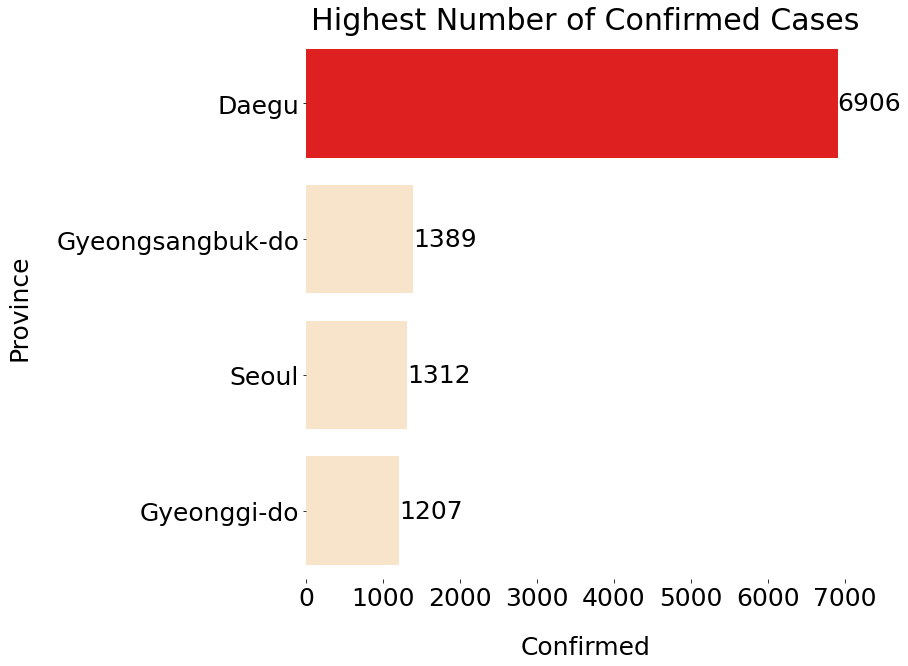

In [13]:
plt.figure(figsize=(10, 10))

plt.title("Highest Number of Confirmed Cases", fontsize=30, y=1);

ord_color = "bisque"
spec_lev1 = "red"

palette = {
    "Daegu": spec_lev1,
    "Gyeongsangbuk-do": ord_color,
    "Seoul": ord_color,
    "Gyeonggi-do": ord_color,
}

chart = sns.barplot(
    x="Confirmed",
    y="Province",
    ci=None,
    dodge=False,
    data=groupby_province,
    order=groupby_province.sort_values("Confirmed", ascending=False).Province,
    palette=palette
)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel("Confirmed", fontsize=25, labelpad=25)
plt.ylabel("Province", fontsize=25, labelpad=25)

sns.despine(left=True, bottom=True)
chart.bar_label(chart.containers[0], size=25);